# Lecture 15:  Solution to the Diffusion Equation - Separation of Variables

### Sections

* [Introduction](#Introduction)
* [Learning Goals](#Learning-Goals)
* [On Your Own](#On-Your-Own)
    * A Fourier `sin` Series
    * Plotting terms using `interact`

* [In Class](#In-Class)
    * Seperating variables
    * Using `dsolve`
    * Plotting the solution

* [Homework](#Homework)
* [Summary](#Summary)
* [Looking Ahead](#Looking-Ahead)
* [Reading Assignments and Practice](#Reading-Assignments-and-Practice)

### Introduction
----

In this lecture we will use the Notebook to analyze one type of solution to the diffusion equation, apply boundary conditions and fit the solution to the initial condition.

### Learning Goals
----

* Solve a partial differential equation (PDE) by reducing it to two ordinary differential equations (ODE).
* Determine constants by applying the boundary conditions
* Develop an initial condition that fits the solution.

### On Your Own
----

The physical problem is one of computing the temperature evolution (or solute distribution, or any diffusive quantity) in a material over time.  In the solution provided below we assume that the material is L=1.0 long and contains an initial quantity of diffusing substance that varies linearly with position.  So in this case, the initial distribution of substance follows the equation f(x) = x.

You will learn in a bit about why you need to represent the solution as a Fourier sine series.  The coeffIC are the Fourier coefficients on the initial conditions, the finalSolution is the solution to Fick's Law that we will develop.  

In the manipulate function we can change the time, the number of terms, and the diffusion constant ($\alpha$).  We plot the concentration as a function of time.  Unlike some of our other experiences with dsolve and finding constants (e.g. $C_1$) the boundary condition is implicit in the initial conditions.  Using the sine series implied that the solution goes to zero when sine goes to zero.  Let us visualize the solution to get a feel for what we're dealing with.  Here we set up our environment for `sympy`:

In [5]:
import sympy as sp
sp.init_session(quiet=True)
sp.var('x n')

IPython console for SymPy 1.0 (Python 2.7.6-64-bit) (ground types: python)


Here we perform an integration to determine the coefficients of a Fourier sine series (like you've done before) over the domain $\{\,x\, \mid 0 < x < 1\,\}$:

In [7]:
2*sp.integrate(1*sp.sin(1*sp.pi*x),(x,0,1)).simplify()

Now we will switch to plotting our solution using our coefficient solution given above.  A few notes on the following code:

* The next cell sets up the environment for `Matplotlib`.  
* We define a function called `solutionAtX` that takes a value of $x$, $t$, a diffusion coefficient $\alpha$ and the number of terms to use in the Fourier series.
* We define another function to produce a plot (`make_plot`) that we pass to `interact` so that we have an interactive plot to examine the solution and a set of parameters.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

This function uses a list comprehension to generate the value of the concentration field (the solutionAtX) at a point (x,t) for a given diffusion coefficient and number of terms.  Note that there is a local variable `n` that is summed over in the list comprehension.  Note also that I have not (yet) provided information on HOW this solution is reached.  You will get to that in this lecture.

In [2]:
# RUN THIS CELL BEFORE CLASS

def solutionAtX(x, t, alpha, terms):
    return sum([
            (2/(np.pi*n)**2)*
            (np.sin(n*np.pi*x))*
            (-np.pi*n*np.cos(np.pi*n)+np.sin(np.pi*n))*
            np.exp(-t*(alpha*n*np.pi)**2)
         for n in range(1,terms+1,1)
        ])

def make_plot(t=0.01, alpha=0.2, terms=20):
    plt.figure(figsize=(7,5))
    x = np.arange(0, 1, 0.001)
    y = solutionAtX(x, t, alpha, terms)
    plt.plot(x, y, x, x, 'orange')
    plt.fill_between(x, 0, y, alpha=0.2)
    plt.ylim(0.0, 1.0)
    plt.xlabel('Distance')
    plt.ylabel('Concentration')

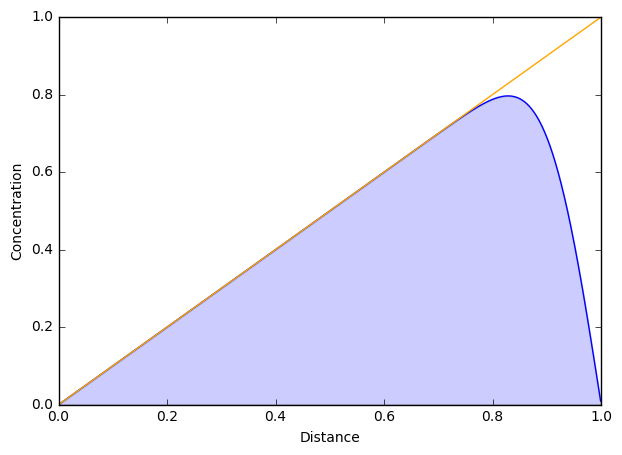

In [3]:
interact(make_plot, t=(0.01,2,0.01), alpha=(0.2,0.5,0.01), terms=(1,40,1));

It will be good practice to examine some of the options that can be changed on the plot and to try and plot different functions.

### In Class
----

#### 1D Diffusion Problem - Separating Variables

There are many ways to solve a PDE.  Separating variables is one such method to reduce a PDE to a pair (or more) of ODEs.  

We start by assuming that the solution has the form of a time dependent piece and a spatially dependent piece.  So we could write:

$$ c(x,t) = X(x) T(t) $$

We substitute this solution into Fick's law:

$$ \frac{\partial c(x,t)}{\partial t} = D \frac{\partial^2 c(x,t)}{\partial x^2} $$

We will differentate the assumed solution of $c(x,t)$ above.  It is usual to let D be $\alpha^2$ to guarantee that D is always positive, we can do this in `sympy` with a keyword in the `symbols` function call.

In [1]:
import sympy as sp
sp.init_session(quiet=True)

IPython console for SymPy 1.0 (Python 2.7.13-64-bit) (ground types: python)


In [2]:
var('X,T',cls=Function)

(X, T)

In [3]:
var('alpha gamma c', positive=True)

The assumption of alpha and gamma as positive is not necessary, but applies for our problem.  Maybe as you go through a second time you can think about why this is true.

With our substitutions in place:

$$ \frac{\partial X(x) T(t)}{\partial t} = \alpha^2 \frac{\partial^2 X(x) T(t)}{\partial x^2} $$

In [4]:
spacePiece = None # your code here.
spacePiece

In [5]:
timePiece = None # your code here.
timePiece

  We can arrange these expressions so that all the functions of "t" are on one side and the functions of "x" are on the other side.  
  
  Divide by $\alpha^2 X(x) T(t)$ to seperate variables.  Note also that this means that the product $\alpha^2 X(x) T(t)$ should never be zero.

Add a seperation constant $\gamma$ and integrate:

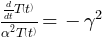

In [6]:
timeODE = sp.Eq(T(t).diff(t,1)/(alpha**2*T(t)),-gamma**2)
timeODE

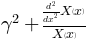

In [7]:
spaceODE = X(x).diff(x,2)/X(x)+gamma**2
spaceODE

Invoke `dsolve()`

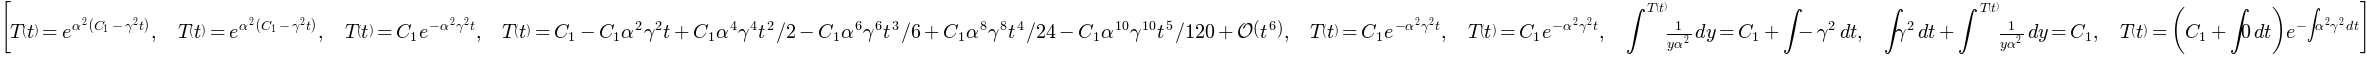

In [8]:
list_of_hints = sp.classify_ode(timeODE)
[sp.dsolve(timeODE,T(t), hint=hint) for hint in list_of_hints]

In [9]:
timePiece = sp.dsolve(timeODE,T(t), hint='1st_linear')
timePiece

In [10]:
spacePiece = sp.dsolve(spaceODE,X(x))
spacePiece

The solution (with constants) is the product of the two solutions above.  We will need to "absorb" the time solution constant into the space solution constant.  The constant in the time solution is absorbed into the space solution hence the substitution for C[1] where we set it to 1 in the first factor, this is a little "hackish" as we have two expressions with C[1] on one line of code - not so neat and tidy, but it works out with some attention to detail.  There are an infinity of solutions depending on our choices of C[1] and C[2].  These will ultimately be determined by the boundary conditions.

I would also note here the following:  the CAS (SymPy in this case) did the heavy lifting for us above.  The code below is really to just keep ourselves organized.  I don't intend to do much with `generalSolution` except to make substitutions to find the boundary conditions.  I'd say that working with a CAS is equal parts setup and deciphering the results.  Probably not what you were expecting - but that is the state of the art for now.

Clean up the solution for use below.  Eliminate one of the constants as the product of C1 and C2 is also a constant.

In [11]:
var('C1 C2')

In [12]:
Eq((timePiece.rhs).subs(C1,1)*spacePiece.rhs,c(x,t))

In [13]:
var('C1 C2')
generalSolution = Eq(c(x,t),(timePiece.rhs).subs([(C1,1)])*spacePiece.rhs)
generalSolution

#### Boundary Conditions

All that is left to do is impose the boundary conditions and fit the solution to our initial condition (where decide may mean that you translate from your problem).  

Let us say that we have an initial concentration of diffusant ($c=x$) between $0<x<1$ and at the boundaries of the problem the $c(x,t)=0$ for $x=0$ and $x=1$.  

To do this, substitute the solution into the boundary conditions.

The following is a reminder for the behavior at the boundaries:

In [ ]:
%matplotlib inline
interact(make_plot, t=(0.01,2,0.01), alpha=(0.2,0.5,0.01), terms=(1,40,1));

Make no mistake - some of this is contrived so that we can exercise certain procedures and start you thinking about how to represent diffusive problems.

In this problem we are assuming that there is a THING.  The thing has some substance that can diffuse inside.  So we set up an initial condition in our mind - the thing has a substance whose distrubtion obeys the function $f(x)=x$.  This is just a decision we make - there is no reason it has to be this.  In can be anything we like.  Further - we assume that at the start of the diffusive experiment the boundaries of the thing are held at a constant value of the diffusing substance.  So the following conditions apply:

$$ c(0,t) = 0 $$
$$ c(1,t) = 0 $$
$$ c(x,0) = x $$

The domain of the experiment is $\{\,x\, \mid 0 < x < 1\,\}$

In [ ]:
generalSolution

Start by substituting the boundary condition $c(0,t) = 0$:

In [ ]:
generalSolution.subs({x:0})

The only way this can be true is if $C_2$ is zero.  Make that substition and insert the second boundary condition:

In [ ]:
generalSolution.subs({x:1, C2:0})

_So - wait, what?  How can we let $C1=0$ too?_

That IS a solution.  It just is not the one we're looking for, so we need to examine how the third factor (the sin term) can help us.  

What about the exponential?  At the boundary there is no dependence of $x$ in this factor however we know that the parameters in the exponential will not cause that factor to go to zero.  It starts at one and just gets smaller - so looking at the second factor will not help us much.  

This means that we have to let $\sin(\gamma)=0$.  We know this can happen with the right choice of $\gamma$.  What choices can we use?

What if:

$$\gamma = \pm \pi, \pm 2\pi, \pm 3\pi, ... $$

So to generalize:

$$\gamma = \pm n\pi$$

In [ ]:
generalSolution.subs({t:0, C2:0})

Now this statement tells us that we need to find a constant $C_1$ such that $c(x,0)=x$.  You may be wondering how we can do that - but you already know how to do that.

We identify the diffusion PDE (Fick's Law) as a homogeneous PDE. Kreyszig defines homogeneous as an equation in $u$ where "each of its terms contains either $u$ or one of its partial derivatives".  Because the equation is a homogeneous PDE we can invoke the principle of superposition that combinations of solutions to the PDE are also solutions to the PDE.

So it is therefore possible to write (without proof) that the initial condition:

$$c(x,0) = \sum_{n=1}^N C_n sin(n\pi x) $$

and the general solution to the equation is:


$$c(x,t) = \sum_{n=1}^N C_n sin(n\pi x) e^{- \alpha^2 n^2 \pi^2 t}$$

The summation is the Fourier sine series.

### Homework
----

From Farlow's book entitled "Partial Differential Equations for Scientists and Engineers" he poses the following two problems:

1.  Find the Fourier sine expansion of $\phi(x)=1$ on the domain $0 \le x \le 1$.  Structure your solution/code so that you can investigate the series as a function of the number of terms it contains.  It will be helpful to pay attention to the values of the wavenumber and coefficients.  (Maybe symbolic computation will help?)
1.  Using the results of the previous problem, what is the solution to the following initial boundary value problem (PDE):

$$
\begin{array}{lll}
\mathrm{PDE} & u_t = u_{xx} & 0 \le x \le 1 \\
\mathrm{BCs} & u(0,t) = 0 & 0 \le t \le \infty \\
 & u(1,t) = 0 & \\
\mathrm{IC}  & u(x,0) = 1 & 0 \le x \le 1
\end{array}
$$

Note that there is a physical impossibility in this problem.  Can you identify it and discuss as part of your solution?


### Looking Ahead
----

The next step we will take is to apply integral transforms to diffusion problems.  These solutions will generate the error function that you may have seen before when studying diffusion.

### Reading Assignments and Practice
----

The parts of this process that I find most challenging are: 1)  rationalizing why there should be a constant of seperation and 2)  developing the expressions for the coefficients in the sin/cos expansion.

There is also an implicit statement of boundary conditions in these problems.  Although in the homework there is an explicit statement of BCs, note that your choice of basis functions (sin series) satisfied the boundary conditions and you didn't have to do much else.  Getting specified flux or other non-zero boundary conditions to work with this method may be challenging.

Good practice is to try and develop series representations of different useful functions.